In [1]:
## what is the probability of deley happens at certain station/time, to predict how many minutes will be deley? 

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# Read the CSV

In [67]:
# the dataset used contains all delays under 30 mins. 
df = pd.read_csv("../Data/df_BD.csv", encoding='unicode_escape')
# Drop the null columns where all values are null
df.shape


(5379, 23)

In [68]:
df.nunique()

Unnamed: 0      5379
id              5379
date             727
time            1214
day                7
station           35
code             103
min_delay         28
min_gap           32
bound              4
line               1
vehicle          394
code_info         98
latitude          35
longitude         35
line_name          1
month             12
time_range         6
month_number      12
hour              24
year               2
Time              24
Time_group         5
dtype: int64

# Data Selection

In [99]:
data_BD = df[['min_delay','Time_group','station','day','code']]
data_BD.nunique()

min_delay      28
Time_group      5
station        35
day             7
code          103
dtype: int64

In [100]:
data_BD.dtypes

min_delay        int64
Time_group    category
station         object
day             object
code            object
dtype: object

In [77]:
y = data_BD["min_delay"].values.reshape(-1, 1)
y

array([[5],
       [5],
       [5],
       ...,
       [4],
       [3],
       [3]], dtype=int64)

In [78]:
X = data_BD[['Time_group','day','station','code']]
X.tail()

,Time_group,day,station,code
5374,mid_day,Monday,DONLANDS STATION,SUAP
5375,mid_day,Monday,ROYAL YORK STATION,EUSC
5376,mid_day,Monday,MAIN STREET STATION,MUPAA
5377,afternoon_rush_hour,Monday,DONLANDS STATION,MUNOA
5378,afternoon_rush_hour,Monday,SHERBOURNE STATION,TUOS


In [79]:
print(X.shape, y.shape)

(5379, 4) (5379, 1)


#  Data Pre-Processing

In [80]:
X_encoded= pd.get_dummies(X)
X_encoded.head()

,Time_group_morning_rush_hour,Time_group_mid_day,Time_group_afternoon_rush_hour,Time_group_evening,Time_group_off_operation,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,...,code_TUMVS,code_TUNIP,code_TUNOA,code_TUO,code_TUOS,code_TUS,code_TUSC,code_TUSET,code_TUST,code_TUSUP
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.6)
print(X_train.shape, y_train.shape)

(2151, 150) (2151, 1)


In [83]:
print(X_test.shape, y_test.shape)

(3228, 150) (3228, 1)


# Standard Scaler

In [86]:
# Create a StandardScater model and fit it to the training data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
#y_scaler = StandardScaler().fit(y_train)

In [87]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
#y_train_scaled = y_scaler.transform(y_train)
#y_test_scaled = y_scaler.transform(y_test)

In [88]:
 # Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
# print and compare training score and testing score
training_score=model.score(X_train_scaled,y_train)
testing_score=model.score(X_test_scaled, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.2945546731763581
Testing Score: -2.5894283208071154e+24


In [92]:
# Make predictions using the X_test_scaled data
#print and compare MSE and R2 score
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test_scaled, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 3.526496329862525e+25, R2: -2.5894283208071154e+24


A "good" MSE score will be close to 0 while a "good" R2 Score will be close to 1. R2 Score is the default scoring for many of the Sklearn models

# make predictions

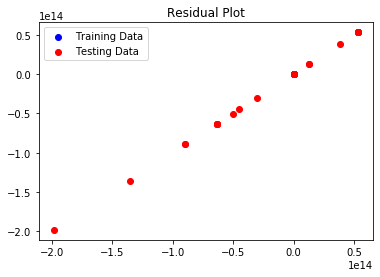

In [95]:
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [96]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

ValueError: If using all scalar values, you must pass an index